In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/kaggle/input/caste-hate-speech-dataset/train.csv')
dev = pd.read_csv('/kaggle/input/caste-hate-speech-dataset/dev.csv')
test = pd.read_csv("/kaggle/input/test-data-of-caste-and-migration-hate-speech/test data.csv")

In [3]:
test.head()

,id,text
0,4594,Humanity paatha intha slag countries prblm var...
1,3593,Avanga Holi kondada oruku poranga da
2,2533,Avangala avanga ooruke anupura vazhiya parunga.
3,6975,பைத்தியமாடா நீ.. நான் சோழிய வேளாளர். நான் என் ...
4,6011,Caste is there parayan think to marry higheru...


In [ ]:
train['label'].value_counts()

In [ ]:
!pip install deep-translator


In [5]:
def text_preprocessing(text):
    # import re
    # pattern = re.compile('[@#\/]\S+')
    # text = pattern.sub(r'',text)

    # pattern = re.compile('\d+')
    # text = pattern.sub(r'', text)

    # pattern = re.compile(r'https?:\/\/\S+|www\.\S+|ftp:\/\/\S+|mailto:\S+|https?:')

    # # First remove URLs
    # text = pattern.sub('', text)

    # # Remove newline characters (\n) and carriage returns (\r)
    # text = text.replace('\n', ' ').replace('\r', '')

    # # Remove extra spaces (including multiple spaces)
    # text = re.sub(r'\s+', ' ', text).strip()

    # import string
    # punc = string.punctuation

    # text = text.translate(str.maketrans('','',punc))

    # emoji_pattern = re.compile(
    #     "["
    #     "\U0001F600-\U0001F64F"  # Emoticons
    #     "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    #     "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    #     "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    #     "\U00002700-\U000027BF"  # Dingbats
    #     "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    #     "\U00002600-\U000026FF"  # Miscellaneous Symbols
    #     "\U00002B50-\U00002B55"  # Stars and other symbols
    #     "]+",
    #     flags=re.UNICODE
    # )

    # text = emoji_pattern.sub(r'', text)

    # tamil_stopwords = [
    # "ஒரு", "என்று", "மற்றும்", "இந்த", "இது", "என்ற", "கொண்டு", "என்பது", "பல", "ஆகும்",
    # "அல்லது", "அவர்", "நான்", "உள்ள", "அந்த", "இவர்", "என", "முதல்", "என்ன", "இருந்து",
    # "சில", "என்", "போன்ற", "வேண்டும்", "வந்து", "இதன்", "அது", "அவன்", "தான்", "பலரும்",
    # "என்னும்", "மேலும்", "பின்னர்", "கொண்ட", "இருக்கும்", "தனது", "உள்ளது", "போது", "என்றும்",
    # "அதன்", "தன்", "பிறகு", "அவர்கள்", "வரை", "அவள்", "நீ", "ஆகிய", "இருந்தது", "உள்ளன",
    # "வந்த", "இருந்த", "மிகவும்", "இங்கு", "மீது", "ஓர்", "இவை", "இந்தக்", "பற்றி", "வரும்",
    # "வேறு", "இரு", "இதில்", "போல்", "இப்போது", "அவரது", "மட்டும்", "இந்தப்", "எனும்", "மேல்",
    # "பின்", "சேர்ந்த", "ஆகியோர்", "எனக்கு", "இன்னும்", "அந்தப்", "அன்று", "ஒரே", "மிக", "அங்கு",
    # "பல்வேறு", "விட்டு", "பெரும்", "அதை", "பற்றிய", "உன்", "அதிக", "அந்தக்", "பேர்", "இதனால்",
    # "அவை", "அதே", "ஏன்", "முறை", "யார்", "என்பதை", "எல்லாம்", "மட்டுமே", "இங்கே", "அங்கே",
    # "இடம்", "இடத்தில்", "அதில்", "நாம்", "அதற்கு", "எனவே", "பிற", "சிறு", "மற்ற", "விட", "எந்த",
    # "எனவும்", "எனப்படும்", "எனினும்", "அடுத்த", "இதனை", "இதை", "கொள்ள", "இந்தத்", "இதற்கு",
    # "அதனால்", "தவிர", "போல", "வரையில்", "சற்று", "எனக்"
    # ]

    # text_ls = text.split()
    # filtered_words = [word for word in text_ls if word not in tamil_stopwords]
    # # Join the remaining words back into a string
    # text = " ".join(filtered_words)

    from indic_transliteration import sanscript
    from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate
    
    
    text = transliterate(text, sanscript.HK, sanscript.TAMIL)


    
    return text

In [7]:
pip install indic-transliteration

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
train['text'] = train['text'].apply(text_preprocessing)
dev['text'] = dev['text'].apply(text_preprocessing)

In [ ]:
import pandas as pd
import re

# # Sample DataFrame
# data = {'text': ["Hello world! இது ஒரு தமிழ் 문장.", "Python is great. தமிழில் பேசலாம்."]}
# train = pd.DataFrame(data)

# Define regex patterns
english_pattern = re.compile(r'[a-zA-Z]+')  # Matches English words
tamil_pattern = re.compile(r'[\u0B80-\u0BFF]+')  # Matches Tamil words

# Function to count English and Tamil words
def count_words(text):
    english_words = english_pattern.findall(text)
    tamil_words = tamil_pattern.findall(text)
    return len(english_words), len(tamil_words)

# Apply function to each row

train[['english_count', 'tamil_count']] = train['text'].apply(lambda x: pd.Series(count_words(x)))

# Print result
print(train)


In [ ]:
# Sum of the English word count column
english_total = train['english_count'].sum()

# Sum of the Tamil word count column
tamil_total = train['tamil_count'].sum()

print("Total English words:", english_total)
print("Total Tamil words:", tamil_total)


In [ ]:
train['text'][5508]

In [4]:
train.drop(columns='id', inplace=True)
dev.drop(columns='id', inplace=True)
test.drop(columns='id', inplace=True)

In [ ]:
train

In [ ]:
dev

In [ ]:
dev['label'].value_counts()

In [ ]:
# train_sampled = train.groupby('label').apply(lambda x: x.sample(n=min(1000, len(x)), random_state=42))

# # Reset the index to flatten the DataFrame
# train_sampled = train_sampled.reset_index(drop=True)
# train_sampled
# train = train_sampled

In [3]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train[train["label"] == train["label"].value_counts().idxmax()]
df_minority = train[train["label"] == train["label"].value_counts().idxmin()]

# Oversample the minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,  # Sample with replacement
                                   n_samples=len(df_majority),  # Match majority class size
                                   random_state=42)

# Combine both classes to get a balanced dataset
train_balanced = pd.concat([df_majority, df_minority_oversampled])

# Shuffle dataset
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(train_balanced["label"].value_counts())  # Verify balancing


label
1    3415
0    3415
Name: count, dtype: int64


# **Distil BERT**

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10


Training: 100%|██████████| 345/345 [01:04<00:00,  5.36it/s, loss=0.596]


Epoch 2/10


Training: 100%|██████████| 345/345 [01:12<00:00,  4.75it/s, loss=0.498]


Epoch 3/10


Training: 100%|██████████| 345/345 [01:11<00:00,  4.81it/s, loss=0.143]


Epoch 4/10


Training: 100%|██████████| 345/345 [01:12<00:00,  4.79it/s, loss=0.321] 


Epoch 5/10


Training: 100%|██████████| 345/345 [01:11<00:00,  4.79it/s, loss=0.0232]


Epoch 6/10


Training: 100%|██████████| 345/345 [01:12<00:00,  4.79it/s, loss=0.117]  


Epoch 7/10


Training: 100%|██████████| 345/345 [01:12<00:00,  4.79it/s, loss=0.00424]


Epoch 8/10


Training: 100%|██████████| 345/345 [01:12<00:00,  4.79it/s, loss=0.00216]


Epoch 9/10


Training: 100%|██████████| 345/345 [01:12<00:00,  4.79it/s, loss=0.00286] 


Epoch 10/10


Training: 100%|██████████| 345/345 [01:11<00:00,  4.80it/s, loss=0.00397] 



Classification Report for DistilBERT:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       485
           1       0.70      0.71      0.71       302

    accuracy                           0.77       787
   macro avg       0.76      0.76      0.76       787
weighted avg       0.77      0.77      0.77       787



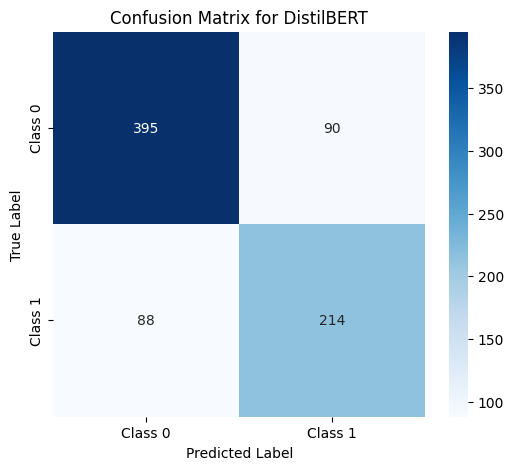

Predictions saved to 'predictions_distilbert.csv'.
Model moved to CPU and GPU memory freed.


In [3]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm
import numpy as np
import pandas as pd

# Load DistilBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-multilingual-cased")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-multilingual-cased", num_labels=2)

# Tokenize the texts
train_encodings = tokenizer(train['text'].tolist(), truncation=True, padding=True, max_length=128)
dev_encodings = tokenizer(dev['text'].tolist(), truncation=True, padding=True, max_length=128)

# Create dataset class
class DistilBertDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = DistilBertDataset(train_encodings, train['label'].tolist())
dev_dataset = DistilBertDataset(dev_encodings, dev['label'].tolist())

# Class weights
class_weights = {0: 1, 1: 1.5}
weights = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float)

# Prepare DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 10
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Move model to device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=weights).to(device)

# Training Loop
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(train_loader, desc="Training", total=len(train_loader))
    for batch in progress_bar:
        for key in batch:
            batch[key] = batch[key].to(device)

        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch['labels'])

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        progress_bar.set_postfix(loss=loss.item())

# Evaluation
model.eval()
with torch.no_grad():
    dev_loader = torch.utils.data.DataLoader(dev_dataset, batch_size=16)
    predictions_distilbert = []
    true_labels = []
    for batch in dev_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_distilbert.extend(preds.cpu().numpy())
        true_labels.extend(batch['labels'].cpu().numpy())

# Print classification metrics
print("\nClassification Report for DistilBERT:")
print(classification_report(true_labels, predictions_distilbert))

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions_distilbert)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for DistilBERT")
plt.show()

# Save the predictions as a DataFrame
predictions_df = pd.DataFrame({
    'text': dev['text'],  # Assuming the 'text' column contains the original text
    'true_label': true_labels,
    'predicted_label': predictions_distilbert
})

# Save to CSV file
predictions_df.to_csv('predictions_distilbert.csv', index=False)

print("Predictions saved to 'predictions_distilbert.csv'.")

# Move model to CPU and free GPU memory
model.cpu()
torch.cuda.empty_cache()
print("Model moved to CPU and GPU memory freed.")


# mbert

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10


Training: 100%|██████████| 345/345 [02:19<00:00,  2.47it/s, loss=0.522]


Epoch 2/10


Training: 100%|██████████| 345/345 [02:15<00:00,  2.54it/s, loss=0.364]


Epoch 3/10


Training: 100%|██████████| 345/345 [02:15<00:00,  2.54it/s, loss=0.259] 


Epoch 4/10


Training: 100%|██████████| 345/345 [02:15<00:00,  2.54it/s, loss=0.0991]


Epoch 5/10


Training: 100%|██████████| 345/345 [02:15<00:00,  2.54it/s, loss=0.0887] 


Epoch 6/10


Training: 100%|██████████| 345/345 [02:15<00:00,  2.54it/s, loss=0.162]  


Epoch 7/10


Training: 100%|██████████| 345/345 [02:16<00:00,  2.54it/s, loss=0.0145] 


Epoch 8/10


Training: 100%|██████████| 345/345 [02:15<00:00,  2.54it/s, loss=0.00896]


Epoch 9/10


Training: 100%|██████████| 345/345 [02:15<00:00,  2.54it/s, loss=0.00145]


Epoch 10/10


Training: 100%|██████████| 345/345 [02:15<00:00,  2.54it/s, loss=0.00109] 



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       485
           1       0.76      0.70      0.73       302

    accuracy                           0.80       787
   macro avg       0.79      0.78      0.79       787
weighted avg       0.80      0.80      0.80       787



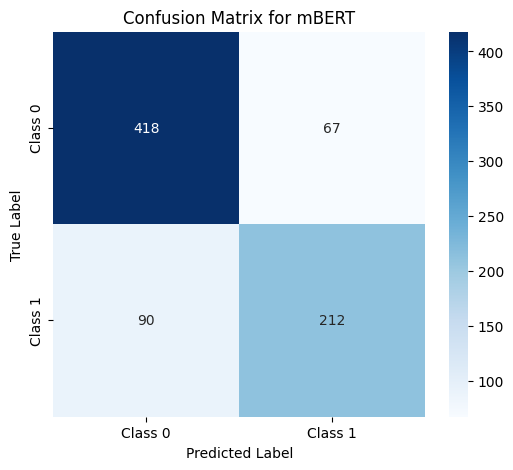

Predictions saved to 'predictions.csv'.
Model moved to CPU and GPU memory freed.


In [5]:
import pandas as pd
import torch
from sklearn.metrics import classification_report, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

# Tokenize the texts
train_encodings = tokenizer(train['text'].tolist(), truncation=True, padding=True, max_length=128)
dev_encodings = tokenizer(dev['text'].tolist(), truncation=True, padding=True, max_length=128)

# Create a dataset class
class BertDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = BertDataset(train_encodings, train['label'].tolist())
dev_dataset = BertDataset(dev_encodings, dev['label'].tolist())

# Calculate class weights
class_counts = train['label'].value_counts()
total_samples = len(train)
class_weights = {0: 1, 1: 2.5}
weights = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float)

# Prepare DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 10
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Move model to device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Define the loss function with class weights
loss_fn = torch.nn.CrossEntropyLoss(weight=weights).to(device)

# Training Loop with tqdm
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(train_loader, desc="Training", total=len(train_loader))
    for batch in progress_bar:
        # Move batch to device
        for key in batch:
            batch[key] = batch[key].to(device)

        # Forward pass
        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch['labels'])

        # Backward pass
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        # Update progress bar
        progress_bar.set_postfix(loss=loss.item())

# Evaluation
model.eval()
with torch.no_grad():
    dev_loader = torch.utils.data.DataLoader(dev_dataset, batch_size=16)
    predictions_mbert = []
    true_labels = []
    for batch in dev_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_mbert.extend(preds.cpu().numpy())
        true_labels.extend(batch['labels'].cpu().numpy())

# Print classification metrics
print("\nClassification Report:")
print(classification_report(true_labels, predictions_mbert))

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions_mbert)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for mBERT")
plt.show()

# Save the predictions as a DataFrame
predictions_df = pd.DataFrame({
    'text': dev['text'],  # Assuming the 'text' column contains the original text
    'true_label': true_labels,
    'predicted_label': predictions_mbert
})

# Save to CSV file
predictions_df.to_csv('predictions_mbert.csv', index=False)

print("Predictions saved to 'predictions.csv'.")

# Move model to CPU and free GPU memory
model.cpu()
torch.cuda.empty_cache()
print("Model moved to CPU and GPU memory freed.")


In [ ]:
# import pandas as pd

# df = pd.Series(predictions)
# print(df.value_counts())


# Indic

config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/135M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indic-bert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10


Training: 100%|██████████| 345/345 [02:03<00:00,  2.79it/s, loss=0.729]


Epoch 2/10


Training: 100%|██████████| 345/345 [02:00<00:00,  2.86it/s, loss=0.672]


Epoch 3/10


Training: 100%|██████████| 345/345 [02:00<00:00,  2.87it/s, loss=0.673]


Epoch 4/10


Training: 100%|██████████| 345/345 [02:00<00:00,  2.86it/s, loss=0.677]


Epoch 5/10


Training: 100%|██████████| 345/345 [02:00<00:00,  2.86it/s, loss=0.497]


Epoch 6/10


Training: 100%|██████████| 345/345 [02:00<00:00,  2.86it/s, loss=0.366]


Epoch 7/10


Training: 100%|██████████| 345/345 [02:00<00:00,  2.86it/s, loss=0.178]


Epoch 8/10


Training: 100%|██████████| 345/345 [02:00<00:00,  2.86it/s, loss=0.17]  


Epoch 9/10


Training: 100%|██████████| 345/345 [02:00<00:00,  2.86it/s, loss=0.0651]


Epoch 10/10


Training: 100%|██████████| 345/345 [02:01<00:00,  2.85it/s, loss=0.0127]



Classification Report for IndicBERT:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       485
           1       0.70      0.72      0.71       302

    accuracy                           0.77       787
   macro avg       0.76      0.76      0.76       787
weighted avg       0.78      0.77      0.77       787



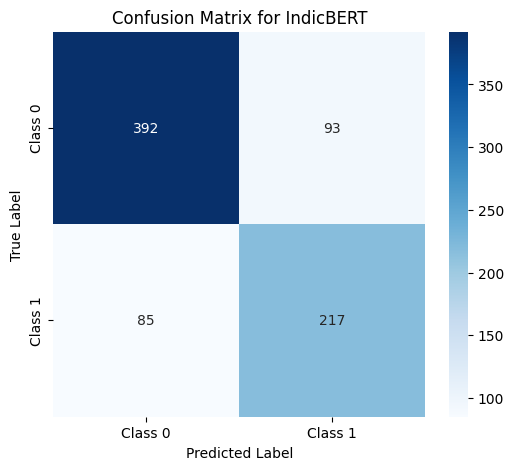

Predictions saved to 'predictions.csv'.
Model moved to CPU and GPU memory freed.


In [6]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load IndicBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("ai4bharat/indic-bert")
model = AutoModelForSequenceClassification.from_pretrained("ai4bharat/indic-bert", num_labels=2)

# Tokenize the texts
train_encodings = tokenizer(train['text'].tolist(), truncation=True, padding=True, max_length=128)
dev_encodings = tokenizer(dev['text'].tolist(), truncation=True, padding=True, max_length=128)

# Create dataset class
class IndicBertDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = IndicBertDataset(train_encodings, train['label'].tolist())
dev_dataset = IndicBertDataset(dev_encodings, dev['label'].tolist())

# Class weights
class_weights = {0: 1, 1: 1.5}
weights = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float)

# Prepare DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 10
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Move model to device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=weights).to(device)

# Training Loop
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(train_loader, desc="Training", total=len(train_loader))
    for batch in progress_bar:
        for key in batch:
            batch[key] = batch[key].to(device)

        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch['labels'])

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        progress_bar.set_postfix(loss=loss.item())

# Evaluation
model.eval()
with torch.no_grad():
    dev_loader = torch.utils.data.DataLoader(dev_dataset, batch_size=16)
    predictions_indic = []
    true_labels = []
    for batch in dev_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_indic.extend(preds.cpu().numpy())
        true_labels.extend(batch['labels'].cpu().numpy())

# Print classification metrics
print("\nClassification Report for IndicBERT:")
print(classification_report(true_labels, predictions_indic))

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions_indic)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for IndicBERT")
plt.show()

# Save the predictions as a DataFrame
predictions_df = pd.DataFrame({
    'text': dev['text'],  # Assuming the 'text' column contains the original text
    'true_label': true_labels,
    'predicted_label': predictions_indic
})

# Save to CSV file
predictions_df.to_csv('predictions_indic.csv', index=False)

print("Predictions saved to 'predictions.csv'.")

# Move model to CPU and free GPU memory
model.cpu()
torch.cuda.empty_cache()
print("Model moved to CPU and GPU memory freed.")

In [ ]:
# df = pd.Series(all_predictions)
# print(df.value_counts())

# Muril

tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/953M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10


Training: 100%|██████████| 345/345 [02:25<00:00,  2.38it/s, loss=0.694]


Epoch 2/10


Training: 100%|██████████| 345/345 [02:20<00:00,  2.46it/s, loss=0.739]


Epoch 3/10


Training: 100%|██████████| 345/345 [02:20<00:00,  2.46it/s, loss=0.597]


Epoch 4/10


Training: 100%|██████████| 345/345 [02:20<00:00,  2.46it/s, loss=0.454] 


Epoch 5/10


Training: 100%|██████████| 345/345 [02:19<00:00,  2.47it/s, loss=0.136] 


Epoch 6/10


Training: 100%|██████████| 345/345 [02:19<00:00,  2.47it/s, loss=0.15]  


Epoch 7/10


Training: 100%|██████████| 345/345 [02:19<00:00,  2.46it/s, loss=0.0162]


Epoch 8/10


Training: 100%|██████████| 345/345 [02:19<00:00,  2.47it/s, loss=0.0139]


Epoch 9/10


Training: 100%|██████████| 345/345 [02:19<00:00,  2.47it/s, loss=0.0115]


Epoch 10/10


Training: 100%|██████████| 345/345 [02:19<00:00,  2.47it/s, loss=0.104]  



Classification Report for MuRIL-BERT:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       485
           1       0.76      0.71      0.73       302

    accuracy                           0.80       787
   macro avg       0.79      0.78      0.79       787
weighted avg       0.80      0.80      0.80       787



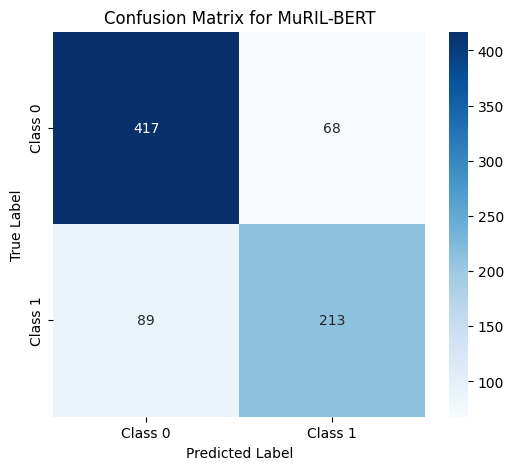

Predictions saved to 'predictions_muril.csv'.
Model moved to CPU and GPU memory freed.


In [8]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm
import numpy as np
import pandas as pd

# Load MuRIL-BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoModelForSequenceClassification.from_pretrained("google/muril-base-cased", num_labels=2)

# Tokenize the texts
train_encodings = tokenizer(train['text'].tolist(), truncation=True, padding=True, max_length=128)
dev_encodings = tokenizer(dev['text'].tolist(), truncation=True, padding=True, max_length=128)

# Create dataset class
class MurilBertDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = MurilBertDataset(train_encodings, train['label'].tolist())
dev_dataset = MurilBertDataset(dev_encodings, dev['label'].tolist())

# Class weights
class_weights = {0: 1, 1: 1.5}
weights = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float)

# Prepare DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 10
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Move model to device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=weights).to(device)

# Training Loop
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(train_loader, desc="Training", total=len(train_loader))
    for batch in progress_bar:
        for key in batch:
            batch[key] = batch[key].to(device)

        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch['labels'])

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        progress_bar.set_postfix(loss=loss.item())

# Evaluation
model.eval()
with torch.no_grad():
    dev_loader = torch.utils.data.DataLoader(dev_dataset, batch_size=16)
    predictions_muril = []
    true_labels = []
    for batch in dev_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_muril.extend(preds.cpu().numpy())
        true_labels.extend(batch['labels'].cpu().numpy())

# Print classification metrics
print("\nClassification Report for MuRIL-BERT:")
print(classification_report(true_labels, predictions_muril))

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions_muril)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MuRIL-BERT")
plt.show()

# Save the predictions as a DataFrame
predictions_df = pd.DataFrame({
    'text': dev['text'],  # Assuming the 'text' column contains the original text
    'true_label': true_labels,
    'predicted_label': predictions_muril
})

# Save to CSV file
predictions_df.to_csv('predictions_muril.csv', index=False)

print("Predictions saved to 'predictions_muril.csv'.")

# Move model to CPU and free GPU memory
model.cpu()
torch.cuda.empty_cache()
print("Model moved to CPU and GPU memory freed.")


# XLM-Roberta

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10


Training: 100%|██████████| 345/345 [02:29<00:00,  2.31it/s, loss=0.704]


Epoch 2/10


Training: 100%|██████████| 345/345 [02:24<00:00,  2.38it/s, loss=0.69] 


Epoch 3/10


Training: 100%|██████████| 345/345 [02:24<00:00,  2.38it/s, loss=0.668]


Epoch 4/10


Training: 100%|██████████| 345/345 [02:24<00:00,  2.38it/s, loss=0.639]


Epoch 5/10


Training: 100%|██████████| 345/345 [02:24<00:00,  2.38it/s, loss=0.695]


Epoch 6/10


Training: 100%|██████████| 345/345 [02:24<00:00,  2.39it/s, loss=0.634]


Epoch 7/10


Training: 100%|██████████| 345/345 [02:24<00:00,  2.39it/s, loss=0.697]


Epoch 8/10


Training: 100%|██████████| 345/345 [02:24<00:00,  2.38it/s, loss=0.653]


Epoch 9/10


Training: 100%|██████████| 345/345 [02:24<00:00,  2.38it/s, loss=0.66] 


Epoch 10/10


Training: 100%|██████████| 345/345 [02:24<00:00,  2.38it/s, loss=0.432]



Classification Report for XLM-R:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       485
           1       0.51      0.65      0.57       302

    accuracy                           0.63       787
   macro avg       0.63      0.63      0.62       787
weighted avg       0.65      0.63      0.64       787



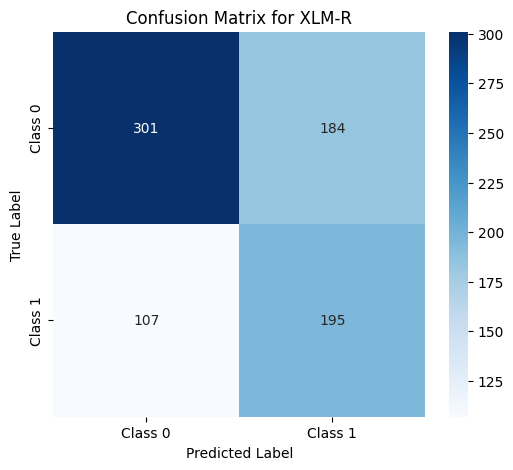

Predictions saved to 'predictions_xlm.csv'.
Model moved to CPU and GPU memory freed.


In [7]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load XLM-R tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")
model = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=2)

# Tokenize the texts
train_encodings = tokenizer(train['text'].tolist(), truncation=True, padding=True, max_length=128)
dev_encodings = tokenizer(dev['text'].tolist(), truncation=True, padding=True, max_length=128)

# Create dataset class
class XLMRobertaDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = XLMRobertaDataset(train_encodings, train['label'].tolist())
dev_dataset = XLMRobertaDataset(dev_encodings, dev['label'].tolist())

# Class weights
class_weights = {0: 1, 1: 1.5}
weights = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float)

# Prepare DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 10
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Move model to device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=weights).to(device)

# Training Loop
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(train_loader, desc="Training", total=len(train_loader))
    for batch in progress_bar:
        for key in batch:
            batch[key] = batch[key].to(device)

        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch['labels'])

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        progress_bar.set_postfix(loss=loss.item())

# Evaluation
model.eval()
with torch.no_grad():
    dev_loader = torch.utils.data.DataLoader(dev_dataset, batch_size=16)
    predictions_xlm = []
    true_labels = []
    for batch in dev_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_xlm.extend(preds.cpu().numpy())
        true_labels.extend(batch['labels'].cpu().numpy())

# Print classification metrics
print("\nClassification Report for XLM-R:")
print(classification_report(true_labels, predictions_xlm))

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions_xlm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XLM-R")
plt.show()

# Save the predictions as a DataFrame
predictions_df = pd.DataFrame({
    'text': dev['text'],  # Assuming the 'text' column contains the original text
    'true_label': true_labels,
    'predicted_label': predictions_xlm
})

# Save to CSV file
predictions_df.to_csv('predictions_xlm.csv', index=False)

print("Predictions saved to 'predictions_xlm.csv'.")

# Move model to CPU and free GPU memory
model.cpu()
torch.cuda.empty_cache()
print("Model moved to CPU and GPU memory freed.")


Ensemble predictions saved to 'ensemble_predictions.csv'.

Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       485
           1       0.72      0.77      0.75       302

    accuracy                           0.80       787
   macro avg       0.79      0.79      0.79       787
weighted avg       0.80      0.80      0.80       787



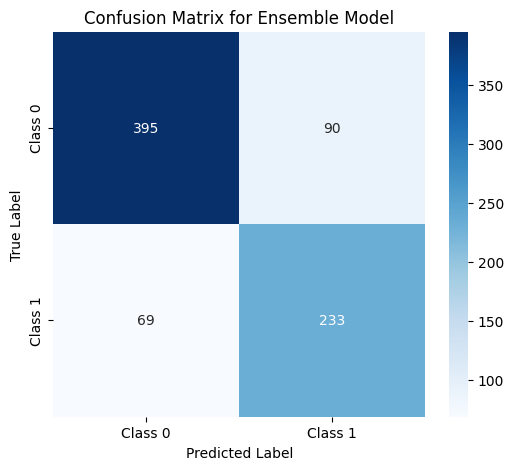

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load predictions from all models
pred_indic = pd.read_csv("predictions_indic.csv")
pred_muril = pd.read_csv("predictions_muril.csv")
pred_xlm = pd.read_csv("predictions_xlm.csv")
pred_mbert = pd.read_csv("predictions_mbert.csv")  # Updated filename for mBERT
pred_distil = pd.read_csv("predictions_distilbert.csv")

# Define weights for each model (adjust based on performance)
weights = {
    "indic": 0.15,
    "muril": 0.35,
    "xlm": 0.15,
    "mbert": 0.35,  # mBERT added here
    "distil": 0.2
}

# Ensure all DataFrames have the same text order
assert (pred_indic['text'] == pred_muril['text']).all()
assert (pred_indic['text'] == pred_xlm['text']).all()

# Extract ground truth labels
true_labels = pred_indic['true_label'].to_numpy()

# Convert predictions to numpy arrays
pred_indic_array = pred_indic['predicted_label'].to_numpy()
pred_muril_array = pred_muril['predicted_label'].to_numpy()
pred_xlm_array = pred_xlm['predicted_label'].to_numpy()
pred_mbert_array = pred_mbert['predicted_label'].to_numpy()
pred_distil_array = pred_distil['predicted_label'].to_numpy()

# Compute weighted sum of predictions
weighted_preds = (
    weights["indic"] * pred_indic_array +
    weights["muril"] * pred_muril_array +
    weights["xlm"] * pred_xlm_array +
    weights["mbert"] * pred_mbert_array +
    weights["distil"] * pred_distil_array
)

# Convert weighted sum into final prediction (thresholding at 0.5 for binary classification)
final_predictions = (weighted_preds >= 0.5).astype(int)

# Save final ensemble predictions
ensemble_df = pd.DataFrame({
    'text': pred_indic['text'],
    'true_label': true_labels,
    'ensemble_predicted_label': final_predictions
})

ensemble_df.to_csv("ensemble_predictions.csv", index=False)
print("Ensemble predictions saved to 'ensemble_predictions.csv'.")

# Generate classification report
print("\nClassification Report for Ensemble Model:")
print(classification_report(true_labels, final_predictions))

# Compute confusion matrix
cm = confusion_matrix(true_labels, final_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Ensemble Model")
plt.show()
